<h3> DataSet </h3>
<ol>
    <li> Reading the DataSet </li>
    <li> Split into Train and Test sets </li>
</ol>

In [7]:
import numpy as np
import pandas as pd
import random
import copy
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

data = pd.read_csv('/home/chandu/Desktop/DMW_April05/Perceptron/Iris.csv')
print("Data shape : " + str(data.shape))

X = data.iloc[:,1:5].values.tolist()
Y_dup = data.iloc[:,5].values.tolist()

c = list(zip(X, Y_dup))
random.shuffle(c)
X, Y_dup = zip(*c)

Y = []
cnt1=0
cnt2=0
cnt3=0
for i in range(len(Y_dup)):
    if Y_dup[i]=='Iris-setosa':
        Y.append(0)
        cnt1+=1
    elif Y_dup[i]=='Iris-versicolor':
        Y.append(1)
        cnt2+=1
    else:
        Y.append(2)
        cnt3+=1


X = np.array(X)
Y = np.array(Y)

col = np.ones((X.shape[0]))
X = np.c_[X, col]

cnt = 100
Xtest = X[cnt:]
Ytest = Y[cnt:]
X = X[:cnt]
Y = Y[:cnt]
print(X.shape)

print(Y)

Data shape : (150, 6)
(100, 5)
[1 1 1 0 2 0 0 1 2 2 0 1 2 2 1 2 1 0 1 0 2 1 1 0 1 2 2 2 0 1 0 2 1 1 0 0 0
 2 1 1 0 2 2 2 2 2 0 2 2 1 0 2 2 0 0 1 0 2 1 2 0 2 0 0 1 2 0 1 0 2 1 1 0 2
 0 2 1 2 2 1 0 2 2 2 1 1 0 0 0 2 1 0 2 1 1 1 0 1 2 1]


100%|██████████| 499/499 [00:00<00:00, 7165.14it/s]


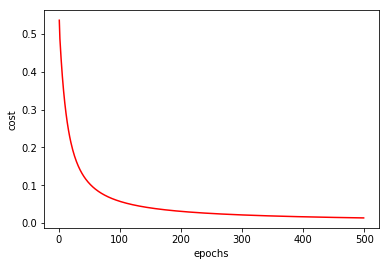

In [8]:

Y1 = copy.deepcopy(Y)

for i in range(Y.shape[0]):
    if Y[i]==2:
        Y[i] = 1

W = np.zeros(X.shape[1])

err = []
ep = []

alpha = 0.1
for epochs in tqdm(range(1, 500)):
    
    hx = X.dot(W)
    hx = np.exp(-hx)
    hx = 1 / (1 + hx)
    dif = hx - Y
    der = (X.T).dot(dif)
    der = der / (X.shape[0])
    W = W - (alpha * der)
    
    error = 0
    hx = X.dot(W)
    hx = np.exp(-hx)
    hx = 1 / (1 + hx)
    for i in range(X.shape[0]):
        if Y[i]==0:
            error+=math.log(1-hx[i])
        else:
            error+=math.log(hx[i])
    error/=X.shape[0]
    error *=-1
    
    err.append(error)
    ep.append(epochs)


plt.plot(ep,err, 'r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

<p> Results tested on test data-set </p>

In [9]:
hx = Xtest.dot(W)
hx = np.exp(-hx)
hx = 1 / ( 1 + hx)
count = 0
total = 0
for i in range(Xtest.shape[0]):
    total+=1
    val = Ytest[i]
    if val==2:
        val = 1
    if round(hx[i])==val:
        count +=1
print(f"Accuracy by considering 1,2 as same labels : {count*100/total}")

Accuracy by considering 1,2 as same labels : 100.0


In [10]:
X_new = []
Y_new = []

for i in range(Y1.shape[0]):
    if Y1[i] == 0:
        continue
    X_new.append(X[i])
    Y_new.append(Y1[i])

X = np.array(X_new)
Y = np.array(Y_new)

100%|██████████| 499/499 [00:00<00:00, 7581.81it/s]


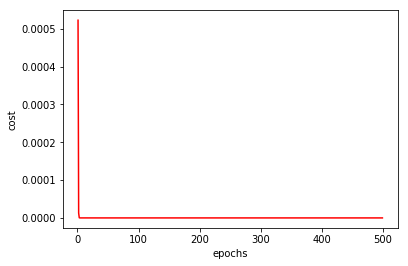

In [11]:
W = np.zeros(X.shape[1])

err = []
ep = []

alpha = 0.1
for epochs in tqdm(range(1, 500)):
    
    hx = X.dot(W)
    hx = np.exp(-hx)
    hx = 1 / (1 + hx)
    dif = hx - Y
    der = (X.T).dot(dif)
    der = der / (X.shape[0])
    W = W - (alpha * der)
    
    error = 0
    hx = X.dot(W)
    hx = np.exp(-hx)
    hx = 1 / (1 + hx)
    for i in range(X.shape[0]):
        if Y[i]==0:
            error+=math.log(1-hx[i])
        else:
            error+=math.log(hx[i])
    error/=X.shape[0]
    error *=-1
    
    err.append(error)
    ep.append(epochs)


plt.plot(ep,err, 'r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [12]:
X_new = []
Y_new = []

for i in range(Ytest.shape[0]):
    if Ytest[i] == 0:
        continue
    X_new.append(X[i])
    Y_new.append(Ytest[i])

Xtest = np.array(X_new)
Ytest = np.array(Y_new)

In [13]:
Ytest-=1
hx = Xtest.dot(W)
hx = np.exp(-hx)
hx = 1 / ( 1 + hx)
count = 0
total = 0
for i in range(Xtest.shape[0]):
    val = Ytest[i]
    if val==-1:
        continue
    total+=1
    if round(hx[i])==val:
        count +=1
print(f"Accuracy by considering 1,2 as same labels : {count*100/total}")

Accuracy by considering 1,2 as same labels : 45.16129032258065
